In [1]:
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

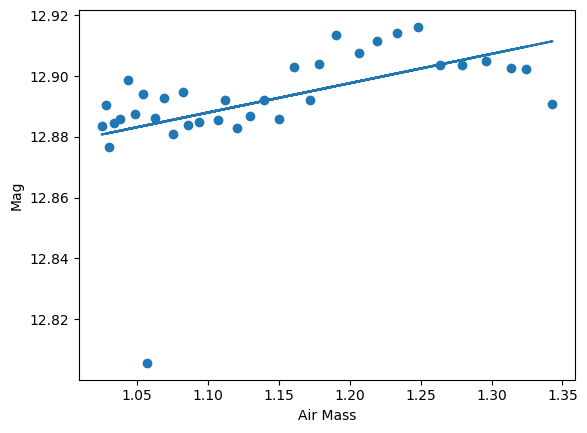

file cal_star_6_G_airmass.csv
params [ 0.09664851 12.78170762]
file cal_star_2_G_airmass.csv
params [ 0.16034453 10.74944874]
file cal_star_5_G_airmass.csv
params [ 0.02224027 12.65708698]
file cal_star_1_G_airmass.csv
params [ 0.15921431 10.75091866]
file cal_star_11_G_airmass.csv
params [ 0.05609299 14.0884601 ]
file cal_star_0_G_airmass.csv
params [ 0.14713552 10.76094926]
file cal_star_3_G_airmass.csv
params [ 0.15884664 10.75123635]
file cal_star_7_G_airmass.csv
params [8.56847845e-03 1.33482588e+01]


In [58]:
ext_coef = []
def linear(x,m,c):
    return m*x+c
counter = 0
for i in np.arange(len(os.listdir('airmass/R'))):
    list = os.listdir('airmass/G')
    df = pd.read_csv('airmass/G/'+list[i])
    average = np.mean(df['Mag'])
    for j in np.arange(len(df['Mag'])):
        check_mag = df['Mag'][j]-average
        if abs(check_mag) > 0.1:
            df = df.drop(j)
        
    if len(df['Mag']) < 3:
        continue

    popt, pcov = curve_fit(linear, df['Air Mass'], df['Mag'])
    if popt[0] < 0:
        continue
    if counter == 0:
        plt.scatter(df['Air Mass'], df['Mag'])
        plt.xlabel('Air Mass')
        plt.ylabel('Mag')
        plt.plot(df['Air Mass'], linear(df['Air Mass'], *popt))
        
        plt.show()
        counter += 1
    ext_coef.append(popt[0])
    print('file',list[i])
    print('params',popt)

In [56]:
print('extinction coefficient',np.mean(ext_coef), '±' , np.mean(ext_coef)/1.8*np.mean(np.sqrt(np.diag(pcov))))

extinction coefficient 0.10113640739989807 ± 0.0005814353246718487


In [61]:
from photometry import platesolve

platesolve('SX UMa','CHr I',True,False)

SX-UMa_LIGHT_2024-04-10T03-36-55Z_Chr-I_60s_-10.0C_E_0068.fits_c.fits
455
Solving.........Success
56 15 25.30 13 26 13.403
SX-UMa_LIGHT_2024-04-09T22-52-30Z_Chr-I_60s_-10.0C_W_0026.fits_c.fits
385
Solving..........Success
56 15 59.05 13 26 17.494
SX-UMa_LIGHT_2024-04-10T04-09-53Z_Chr-I_60s_-10.0C_E_0073.fits_c.fits
403
Solving...........Success
56 15 24.80 13 26 13.417
SX-UMa_LIGHT_2024-04-09T22-31-43Z_Chr-I_60s_-10.0C_W_0023.fits_c.fits
432
Solving..........Success
56 15 58.98 13 26 17.509
SX-UMa_LIGHT_2024-04-09T23-52-50Z_Chr-I_60s_-10.0C_W_0035.fits_c.fits
441
Solving......Success
56 15 59.12 13 26 17.476
SX-UMa_LIGHT_2024-04-10T01-09-39Z_Chr-I_60s_-10.0C_E_0046.fits_c.fits
457
Solving.......Success
56 15 25.01 13 26 13.388
SX-UMa_LIGHT_2024-04-10T02-43-29Z_Chr-I_60s_-9.9C_E_0060.fits_c.fits
447
Solving..........Success
56 15 25.05 13 26 13.388
SX-UMa_LIGHT_2024-04-09T20-50-16Z_Chr-I_60s_-10.0C_W_0008.fits_c.fits
386
Solving..........Success
56 15 59.32 13 26 17.493
SX-UMa_LIGHT_202

In [63]:
from photometry import photometry

photometry('SX UMa','CHr I',9,0,False)

/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60410.150637 from DATE-OBS'.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60409.953125 from DATE-OBS'.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60410.173530 from DATE-OBS'.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60409.938692 from DATE-OBS'.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60409.995023 from DATE-OBS'.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/astropy/wcs/wcs.py:803: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60410.048368 f

OSError: Cannot save file into a non-existent directory: 'airmass/I'

<Figure size 640x480 with 0 Axes>